In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import RMSprop
from PIL import Image as im
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
import keras
import pandas as pd
import numpy as np
import cv2
import os
from keras.metrics import Recall
from keras.metrics import Precision
from sklearn.metrics import fbeta_score
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
data = pd.read_csv("Desktop\dataset2020.csv")

In [3]:
mapping = {'pe-legit': 0, 'pe-malicious': 1}
data.iloc[:,0].replace(mapping, inplace=True)

In [4]:
arr = data.iloc[:,0:]

In [5]:
data3 = data[data['pe-legit']==0]

In [6]:
X = data3.iloc[:,1:].values

In [7]:
dem=0
for x in X:
    ar = np.array(x*255)
    ar = ar.reshape(1,486)
    img=im.fromarray(ar,"RGB")
    tenanh = 'Malware4/train/Legit/' +'pe_legit_'+str(dem)+'.png'
    img.save(tenanh, "PNG")
    dem+=1

In [22]:
dem=0
for x in X:
    ar = np.array(x*255)
    ar = ar.reshape(27,18)
    img=im.fromarray(ar,"RGB")
    tenanh = 'Malware/train/Pe-Legit/' +'pe_legit_'+str(dem)+'.png'
    img.save(tenanh, "PNG")
    dem+=1

FileNotFoundError: [Errno 2] No such file or directory: 'Malware/train/Pe-Legit/pe_legit_0.png'

In [8]:
data4 = data[data['pe-legit']==1]

In [9]:
Y = data4.iloc[:,1:].values

In [41]:
dem1=0
for y in Y:
    ar1 = np.array(x*255)
    ar1 = ar1.reshape(27,18)
    im1g=im.fromarray(ar1,"L")
    tenanh1 ='Malware3/train/Malicious/' +'pe_malicious_'+str(dem1)+'.png'
    im1g.save(tenanh1, "PNG")
    dem1+=1

In [10]:
dem1=0
for y in Y:
    ar1 = np.array(y*255)
    ar1 = ar1.reshape(1,486)
    im1g=im.fromarray(ar1,"RGB")
    tenanh1 ='Malware4/train/Malicious/' +'pe_malicious_'+str(dem1)+'.png'
    im1g.save(tenanh1, "PNG")
    dem1+=1

In [86]:
#############################################################

In [11]:
print(len(data3))
print(len(data4))

24602
24526


In [12]:
img = image.load_img("Malware4/train/Legit/pe_legit_4.png")

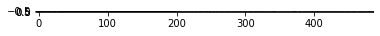

In [13]:
plt.imshow(img)

In [15]:
cv2.imread("Malware4/train/Legit/pe_legit_3.png").shape

(1, 486, 3)

In [4]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
IMG_WIDTH =100
IMG_HEIGHT=100
BATCH_SIZE = 3
MODE='binary'

In [7]:
train_dataset = train.flow_from_directory('Malware/train/',target_size = (IMG_WIDTH,IMG_HEIGHT),batch_size = BATCH_SIZE,
                                          class_mode = MODE)

validation_dataset = validation.flow_from_directory('Malware/validation/',target_size = (IMG_WIDTH,IMG_HEIGHT),
                                              batch_size = BATCH_SIZE,
                                              class_mode = MODE)

Found 49128 images belonging to 2 classes.
Found 6988 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Legit': 0, 'Malicious': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
model = Sequential()
model.add(Convolution2D(64,(3,3), activation ='softsign', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
# model.add(Convolution2D(32,(3,3), activation = 'relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Convolution2D(64,(3,3), activation = 'relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Convolution2D(64,(3,3), activation = 'relu'))
# model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 153664)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               19669120  
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 19,671,041
Trainable params: 19,671,041
Non-trainable params: 0
_________________________________________________________________


In [61]:
OPTI = RMSprop(lr=0.001)

In [62]:
def f1_score(y_true, y_pred, threshold_shift=0):
    beta = 2

    y_pred = K.clip(y_pred, 0, 1)

    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [63]:
model.compile(loss='binary_crossentropy', optimizer = OPTI, metrics = 
              ['accuracy', f1_score, Precision(name='precision'), Recall(name='recall')
               ])

In [64]:
model_fit = model.fit(train_dataset, steps_per_epoch = 100, epochs = 2, validation_data = validation_dataset)

Epoch 1/2
100/100 [==============================] - 47s 469ms/step - loss: 0.8334 - accuracy: 0.9800 - f1_score: 0.9800 - precision: 0.9804 - recall: 0.9804 - val_loss: 3.8492e-21 - val_accuracy: 0.9997 - val_f1_score: 0.9997 - val_precision: 0.9994 - val_recall: 1.0000
Epoch 2/2
100/100 [==============================] - 50s 497ms/step - loss: 4.5862e-09 - accuracy: 1.0000 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.8684e-21 - val_accuracy: 0.9997 - val_f1_score: 0.9997 - val_precision: 0.9994 - val_recall: 1.0000


In [34]:
###########################################################################

In [65]:
model_val = model.evaluate(validation_dataset)

2330/2330 [==============================] - 25s 11ms/step


In [66]:
model_val

[4.868358570483773e-21,
 0.9997137784957886,
 0.9997138381004333,
 0.9994015693664551,
 1.0]

In [29]:
model.metrics_names

['loss', 'accuracy', 'f1_score', 'precision', 'recall']

# model_train
[2.5882590293235808e-08,
 0.9997353553771973,
 0.9997355341911316,
 0.9994702339172363,
 1.0]
model_val
[3.8818487979597194e-08,
 0.9997137784957886,
 0.9997138381004333,
 0.9994015693664551,
 1.0]

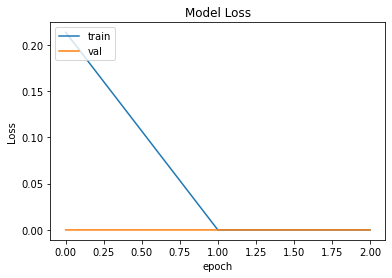

In [18]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

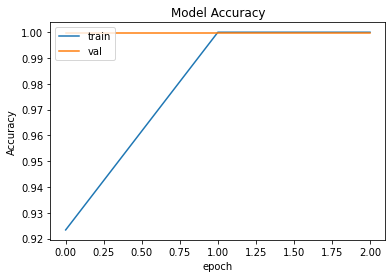

In [19]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

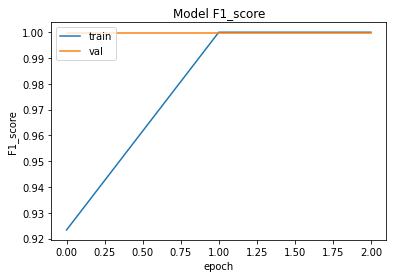

In [20]:
plt.plot(model_fit.history['f1_score'])
plt.plot(model_fit.history['val_f1_score'])
plt.title('Model F1_score')
plt.ylabel('F1_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

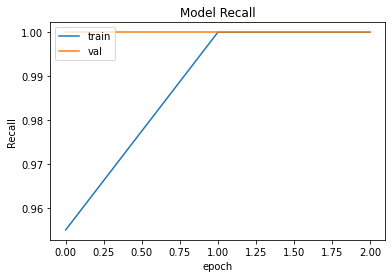

In [21]:
plt.plot(model_fit.history['recall'])
plt.plot(model_fit.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

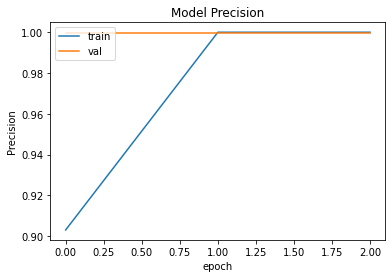

In [22]:
plt.plot(model_fit.history['precision'])
plt.plot(model_fit.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
import itertools 

In [1]:
target_names = []
for key in train_dataset.class_indices:
    target_names.append(key)

NameError: name 'train_dataset' is not defined

In [16]:
y_pred = model.predict_generator(train_dataset)

KeyboardInterrupt: 

In [26]:
Y_pred = np.argmax(y_pred, axis=1)

In [27]:
ar = confusion_matrix(validation_dataset.classes, Y_pred)

In [28]:
ar 

array([[3648,    0],
       [3340,    0]], dtype=int64)

In [148]:
cm = np.array(ar)

In [149]:
normalize = False;

In [150]:
# def plot_confusion_matrix(cm, classes,
#                         normalize=True,
#                         title='Confusion matrix',
#                         cmap=plt.cm.Blues):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=0)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#             horizontalalignment="center",
#             color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3648    0]
 [3340    0]]


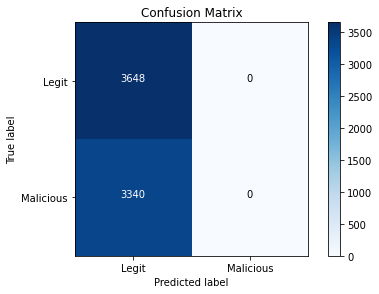

In [152]:
plot_confusion_matrix(cm, target_names, normalize, title= "Confusion Matrix")